# Programming with Python MOD007891 
## Assessment Element 010 ( Weighting = 100% )


# Section 1:  ( Analysis of Diabetic Patient Data ) - ( Weighting = 30% )

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases.** The dataset consist of several medical predictor **(independent)** variables and one target **(dependent)** variable, Outcome. 

Independent variables include:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- Two-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Outcome: Class variable (0 or 1).


#### Upload the provided dataset (diabetes.csv) into your Jupyter Notebook working directory and then complete the following tasks.  

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv("Dataset/diabetes.csv")

In [34]:
# Let's look at the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. Identify the total number of records? 

In [16]:
df.shape[0]

768

### 2. Display data types for all columns? 

In [29]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### 3.  Check the dataset for the missing values? 

In [30]:
df.isnull().values.any()

False

### 4. Display descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset such as total count, min, max, standard deviation, max and quartiles?

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As you probably have noticed, many columns have a **minimum value of 0** which is clearly not logical. Those are essentially **missing values** in our dataset. 



### 5. Identify columns with missing values and find out their frequency? 

In [32]:
#listing columns with missing values(0)
missing_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [33]:
def show_zero(col_name):
    print('%s: %d'%(col_name, df[df[col_name]==0].shape[0])) #Identifying the number of '0' values

In [34]:
#loopig through each name in missing_col and calling the function
for col_name in missing_col:
    show_zero(col_name)

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


### 6. Identify the number of positive and negative patients based on target (dependent) variable, outcome? Plot the frequencies using a bar chart?

In [17]:
#number of patients in each outcome
outcome= df['Outcome'].value_counts()
outcome

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Patient Outcome', ylabel='Frequency'>

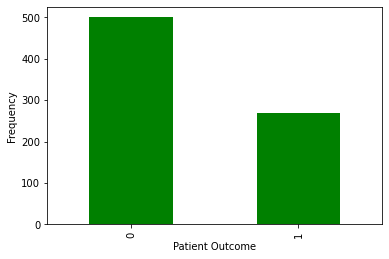

In [35]:
#plotting the above results
outcome.plot.bar(color="green", xlabel= 'Patient Outcome', ylabel='Frequency')

### 7. Display correlation among all dependent and independent variables using the correlation matrix? Illustrate correlation data using a heatmap plot?  

In [37]:
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

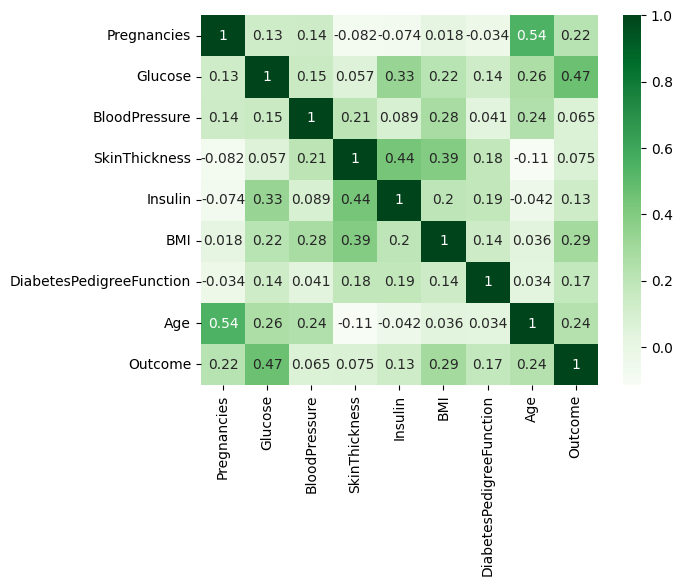

In [38]:
sns.heatmap(correlation, cmap="Greens", annot=True)

We have observed earlier that missing values in this dataset are represented by 0. This is clearly not a good practice and negatively impacts our data analysis. 



### 8. Replace these zero values with NAN?

In [39]:
df[missing_col] = df[missing_col].replace(0, np.NaN)

### 9. Check out the variables for 0 value once again?  

In [40]:
for col_name in missing_col:
    show_zero(col_name)

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


### 10. Check out the missing values counts per variable?

In [46]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 11. Identify the mean value for each variable? 

In [50]:
df.describe().T["mean"]

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
Name: mean, dtype: float64

### 12. For the following columns, fill missing values with mean column values?  
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [69]:
df_count_mean = df[missing_col].describe().T[["count", "mean"]]
df_count_mean["count"] = df_count_mean["count"].apply(lambda value: int(df.shape[0]-value))
df_count_mean.rename(columns={"count": "missing"}, inplace=True)
df_count_mean

,missing,mean
Glucose,5,121.686763
BloodPressure,35,72.405184
SkinThickness,227,29.153420
Insulin,374,155.548223
BMI,11,32.457464


### 13. Display descriptive statistics and checkout the min values of the aforementioned columns once again? Any ZEROS ? 

In [72]:
df[missing_col].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,763.000000,733.000000,541.000000,394.000000,757.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.535641,12.382158,10.476982,118.775855,6.924988
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,22.000000,76.250000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,141.000000,80.000000,36.000000,190.000000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [88]:
#checking for 0 in any of the mentioned columns
df[missing_col].describe().loc["min"] == 0

Glucose          False
BloodPressure    False
SkinThickness    False
Insulin          False
BMI              False
Name: min, dtype: bool

### 14. Check out the missing values counts per variable, once again? 

In [104]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 15. Plot data distribution of each variable? Explain your thoughts 

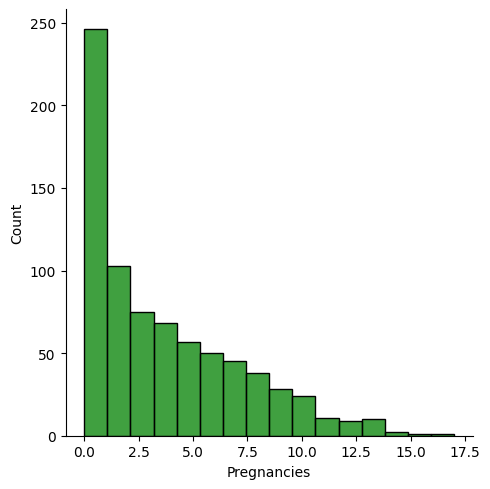

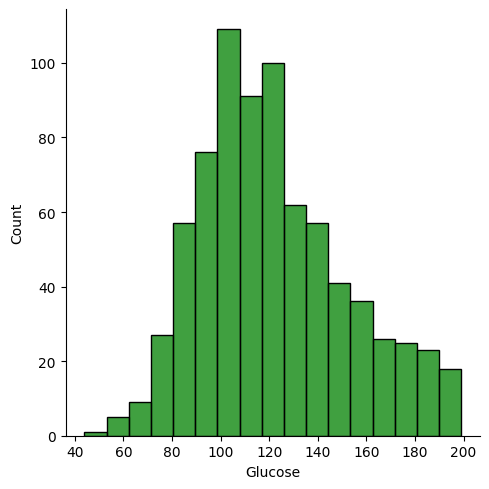

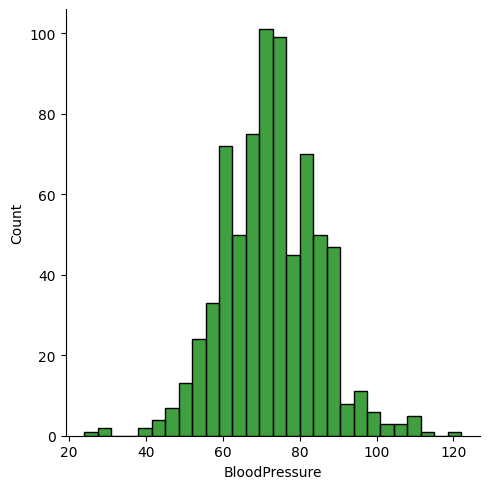

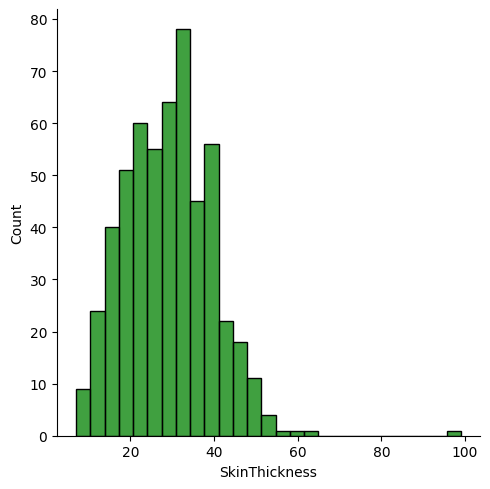

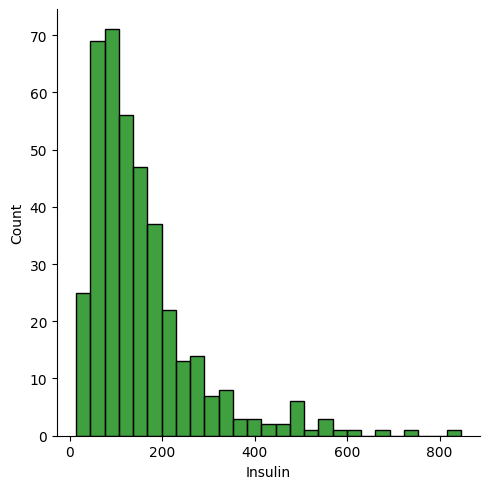

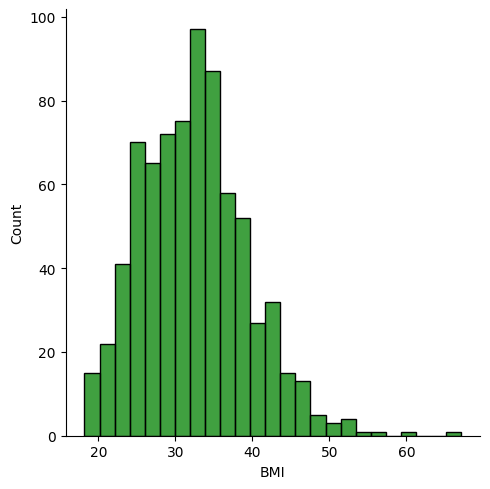

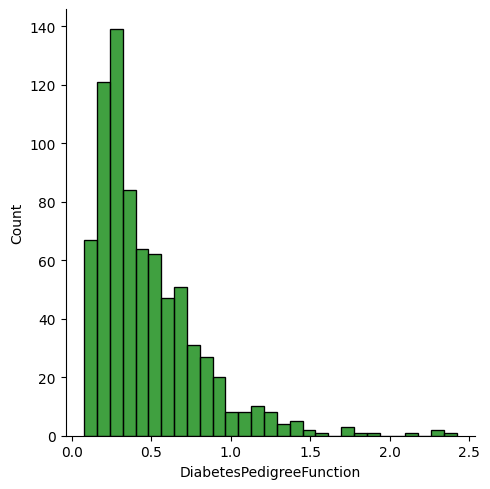

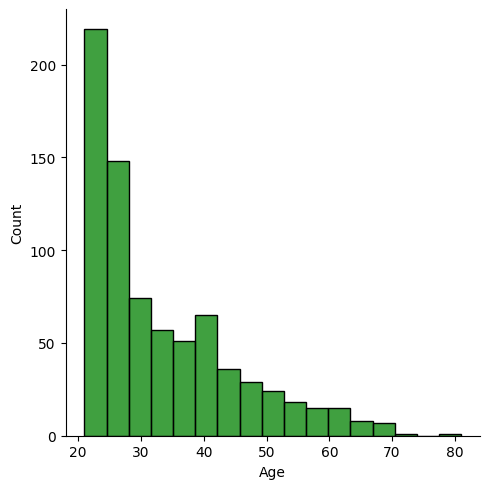

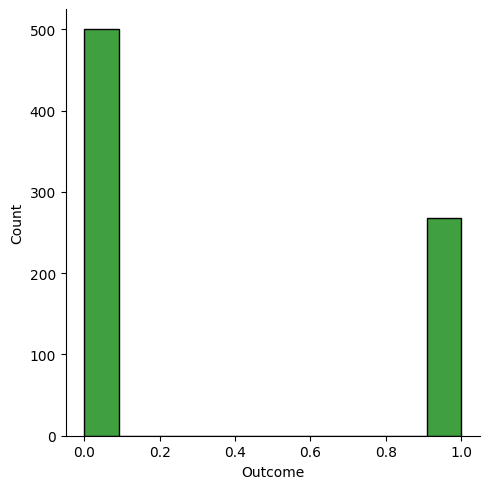

In [180]:
for col in df.columns:
    plot = sns.displot(df, x=col, color="green")
    plt.show()
    
'''comparing the graph plots we see that:
> The data provided pertains more to the younger population aged between 20-40
> More tha half of the population is Diabetic patients'''

In [ ]:
A Boxplot is a method for graphically depicting groups of numerical data through their quartiles. 

### 16. Plot the Boxplot for each variable? interpret the diagrams 

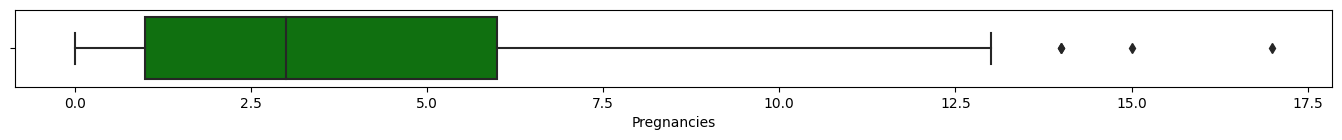

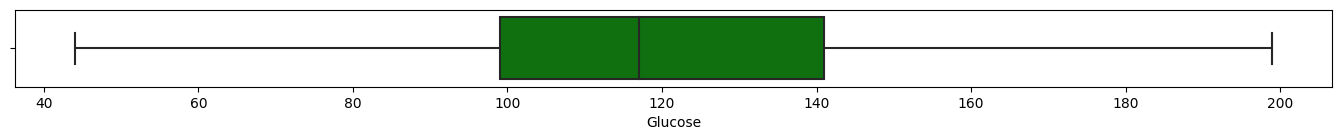

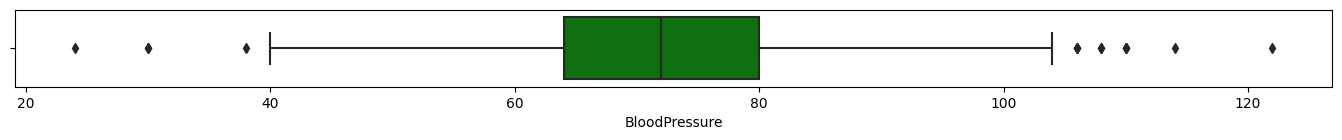

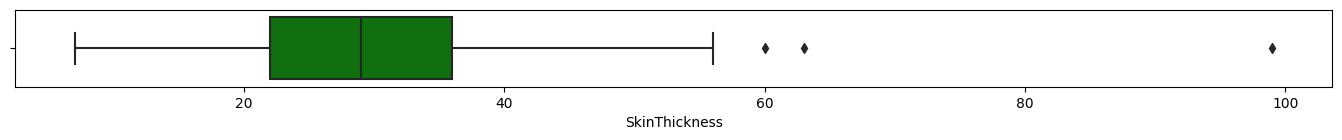

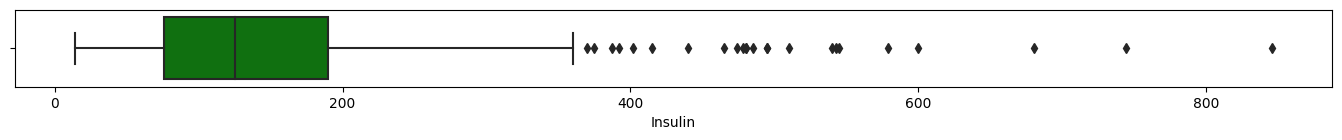

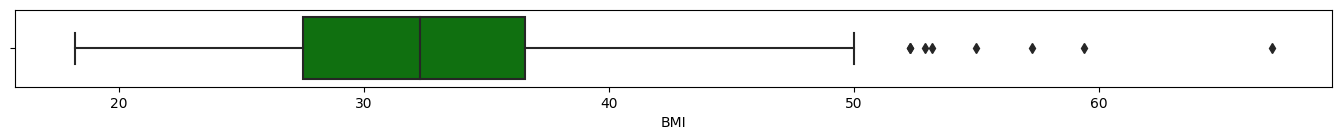

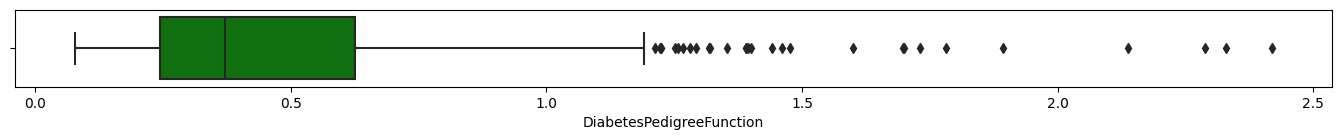

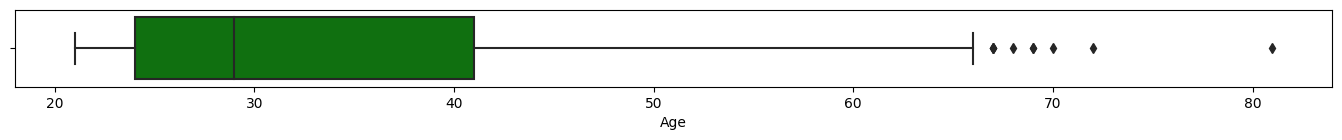

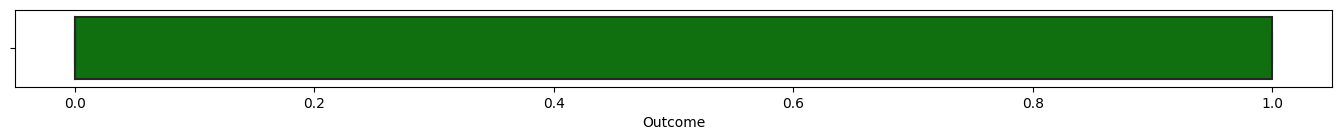

In [161]:
for column in df:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df, x=column, color="green")

### 17. Plot demographic and distribution of diabetics/nondiabetics across age variable?

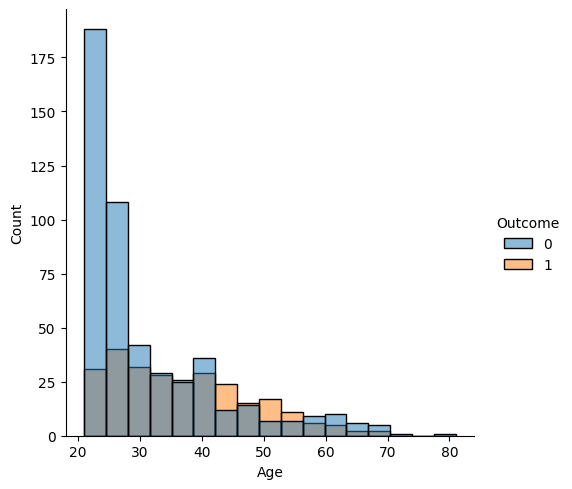

In [188]:
plot = sns.displot(df, x="Age", hue="Outcome")
plt.show()

### 18. Investigate how the number of pregnancies impacts diabetes? Demonstrate the relationship with a plot. 

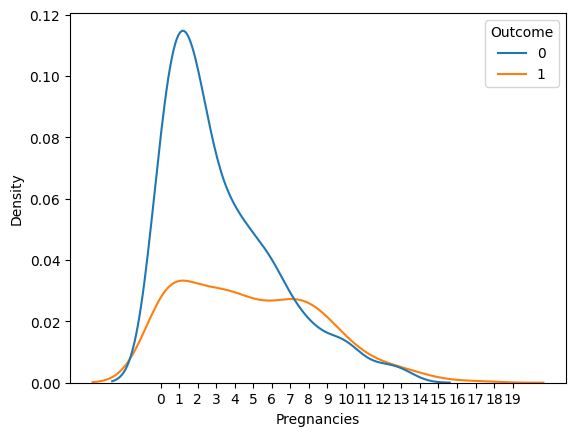

In [196]:
plot = sns.kdeplot(df, x="Pregnancies", hue="Outcome")
plt.xticks(np.arange(0,20,1))
plt.show()

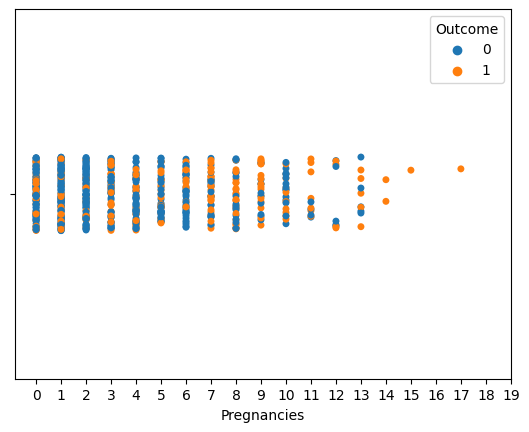

In [207]:
plot = sns.stripplot(df, x="Pregnancies", hue="Outcome")
plt.xticks(np.arange(0,20,1))
plt.show()

### 19. Check if there are any outliers in our dataset. Any data point outside 25% and 75% quarters can be considered an outlier. Remove the outliers from our dataset. 

In [211]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [221]:
df75 = df["DiabetesPedigreeFunction"] <= df["DiabetesPedigreeFunction"].quantile(0.75)
df25 = df["DiabetesPedigreeFunction"] >= df["DiabetesPedigreeFunction"].quantile(0.25)

df[df25 & df75]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
11,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


### 20. Create a new categorical variable based on BMI using the following criteria. Name the new variable “BMI_tier” and add it to our dataset as a new column. 

- BMI = 0  then “NA”
- 0 < BMI < 18.5 then “Under Weight”
- 18.5 <= BMI < 25 then “Normal”
- 25 <= BMI < 30 then “Overweight” 
- 30 <= BMI then “Obese”


In [230]:
#creating a function to define the required criteria
def calc_tier(BMI):
    if np.isnan(BMI) or BMI < 0:
        return "NA"
    elif 0 < BMI < 18.5:
        return "Under Weight"
    elif 18.5 <= BMI < 25:
        return "Normal"
    elif 25 <= BMI < 30:
        return "Overweight"
    else:
        return "Obese"

In [231]:
#defining new column to the dataset
df["BMI_tier"] = df["BMI"].apply(calc_tier)

In [232]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese


### 21. Plot the BMI_tier histogram ?  

<AxesSubplot: xlabel='BMI_tier', ylabel='Count'>

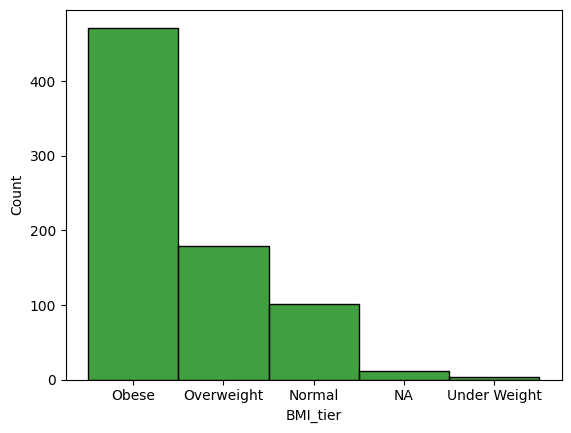

In [234]:
sns.histplot(df, x="BMI_tier", color="green")

### 22. How many obese individuals exist in our dataset?  Use  Piechart to illustrate the proportion of each BMI tier? 

In [238]:
df["BMI_tier"].value_counts()["Obese"]

472

<AxesSubplot: ylabel='BMI_tier'>

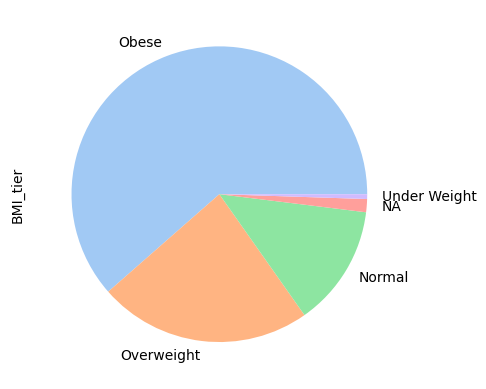

In [266]:
df["BMI_tier"].value_counts().plot(kind='pie',colors=sns.color_palette('pastel'))

### 23. Create a new categorical variable based on Oral Glucose Tolerance Test (Glucose) using the following criteria, suggested by DIABETES UK. Name the new variable “OGTT_tier” and add it to our dataset as a new column. 

- Glucose == 0 then “NA”
- Glucose < 140 then “Normal”
- 140 <= Glucose < 198 then “Impaired Glucose Tolerance”
- 198 <= Glucose then “Diabetic Level”


In [267]:
#creating a function to define the required criteria
def cal_ogtt(Glucose):
    if np.isnan(Glucose) or Glucose < 0:
        return "NA"
    elif Glucose < 140:
        return "Normal"
    elif 140 <= Glucose < 198:
        return "Impaired Glucose Tolerance"
    else:
        return "Diabetic Level"

# new column
df["OGTT_tier"] = df["Glucose"].apply(cal_ogtt)

In [268]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier,OGTT_tier
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obese,Impaired Glucose Tolerance
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal,Impaired Glucose Tolerance
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,Normal


### 24.How many individuals are categorized as “Diabetic Level” in our newly created variable, “OGTT_tier”?  Plot the “OGTT_tier” histogram?   

In [272]:
df[df["OGTT_tier"] == "Diabetic Level"]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier,OGTT_tier
561,0,198.0,66.0,32.0,274.0,41.3,0.502,28,1,Obese,Diabetic Level
661,1,199.0,76.0,43.0,NaN,42.9,1.394,22,1,Obese,Diabetic Level


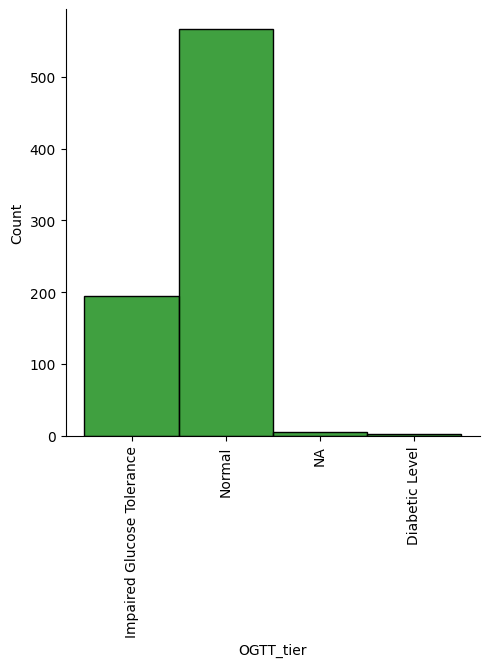

In [295]:
ax = sns.displot(df, x="OGTT_tier", color="green")
plt.xticks(rotation=90)
plt.show()

### 25. Out of those who categorized as “Impaired Glucose Tolerance”, how many of them are actually diabetes? What about those with “Normal” OGTT_tier?  

In [314]:
impaired = df["OGTT_tier"] == "Impaired Glucose Tolerance"
df[impaired]["Outcome"].value_counts().loc[1]

133

# Section 2:  ( 2021  Tokyo Olympics ) - ( Weighting = 30% )

In this task we work with 2021 Tokyo summer Olympics dataset. This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics. This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [25]:
athlete_data = pd.read_excel("Dataset/Athletes.xlsx")
coach_data = pd.read_excel("Dataset/Coaches.xlsx")
gender_data = pd.read_excel("Dataset/EntriesGender.xlsx")
medal_data = pd.read_excel("Dataset/Medals.xlsx")
team_data = pd.read_excel("Dataset/Teams.xlsx")

/Users/merin/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### Let's look at the first few rows for each table

In [363]:
athlete_data.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [364]:
coach_data.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [26]:
gender_data.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [322]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [762]:
team_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


### 1. Which countries do most athletes come from? Plot a descendingly ordered bar plot to show athletes counts based on their country of origin? 

In [27]:
athlete_country= athlete_data["NOC"].value_counts()[:50]
athlete_country

United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
France                        377
Canada                        368
Great Britain                 366
Italy                         356
Spain                         324
ROC                           318
Brazil                        291
Netherlands                   274
Republic of Korea             223
New Zealand                   202
Poland                        195
Argentina                     180
South Africa                  171
Mexico                        155
Hungary                       155
Ukraine                       152
Egypt                         133
Sweden                        129
Belgium                       125
India                         117
Czech Republic                117
Ireland                       116
Switzerland                   115
Belarus                       104
Denmark       

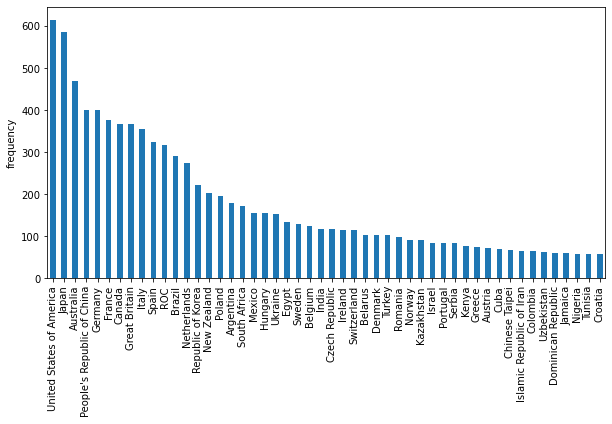

In [28]:
fig, ax = plt.subplots()
athlete_country.plot(figsize=(10, 5), ax = ax, kind = 'bar', ylabel = 'frequency')
plt.show()

### 2. Which country has the most female athletes? Plot a descendingly ordered bar plot to show female athletes counts based on their country of origin?

In [375]:
country_women = team_data[team_data["Event"] == "Women"]["NOC"].value_counts()
country_women

People's Republic of China    9
Japan                         9
United States of America      8
ROC                           6
Netherlands                   6
Australia                     6
Canada                        6
Brazil                        6
Spain                         5
France                        4
New Zealand                   3
Great Britain                 3
Kenya                         3
Argentina                     3
Germany                       3
Italy                         3
Republic of Korea             3
Switzerland                   2
South Africa                  2
Hungary                       2
Sweden                        2
Serbia                        2
Latvia                        1
Romania                       1
Dominican Republic            1
Fiji                          1
Puerto Rico                   1
Ireland                       1
India                         1
Norway                        1
Montenegro                    1
Cuba    

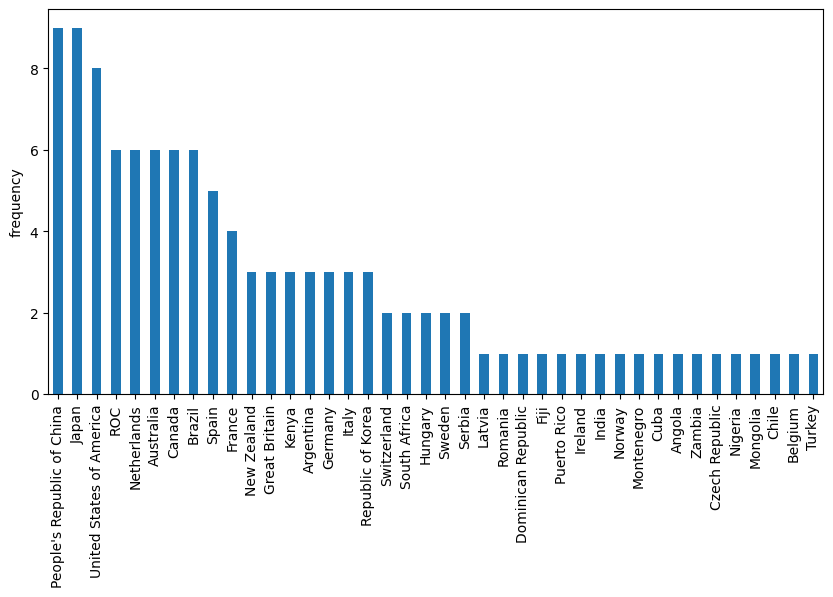

In [376]:
fig, ax = plt.subplots()
country_women.plot(figsize=(10, 5), ax = ax, kind = 'bar', ylabel = 'frequency')
plt.show()

### 3. Which country has the least female athletes?

In [395]:
all_countries = set(athlete_data["NOC"].unique())

In [396]:
countries_with_women = set(team_data[team_data["Event"]=="Women"]["NOC"].unique())

In [401]:
# Countries with no women athletes
countries_without_women = all_countries - countries_with_women
np.array(countries_without_women)

array({'Thailand', 'Albania', 'Monaco', 'Jamaica', 'Djibouti', 'Bulgaria', 'Guam', 'Madagascar', 'Palestine', 'Yemen', 'Marshall Islands', 'American Samoa', "Lao People's Democratic Republic", 'Ethiopia', 'Haiti', 'Georgia', 'Nicaragua', 'Paraguay', 'Malaysia', 'Bahrain', 'Guatemala', 'Venezuela', 'Austria', 'Jordan', 'Cook Islands', 'Ukraine', 'Federated States of Micronesia', 'Senegal', 'Ghana', 'Morocco', 'Kiribati', 'Kyrgyzstan', 'Indonesia', 'Sao Tome and Principe', 'Rwanda', 'Guyana', 'Bangladesh', 'Estonia', 'Denmark', 'Philippines', 'Republic of Moldova', 'Slovakia', 'Benin', 'South Sudan', 'Algeria', 'Ecuador', 'Sierra Leone', 'Dominica', 'Kosovo', 'Slovenia', 'United Republic of Tanzania', 'Sudan', 'Burkina Faso', 'Zimbabwe', 'Burundi', 'Tunisia', 'Hong Kong, China', 'Pakistan', 'Luxembourg', 'Bermuda', 'Belize', 'Gabon', 'Mauritania', 'Barbados', 'Saint Kitts and Nevis', 'Comoros', 'Lebanon', 'Papua New Guinea', 'Bolivia', 'Niger', 'Tonga', 'Bahamas', 'Central African Republ

In [421]:
# finding countries with women participants with least number
countries_with_women = team_data[team_data["Event"]=="Women"]["NOC"].value_counts(ascending=True)

In [422]:
participation_count = countries_with_women[0]

In [427]:
countries_with_women[countries_with_women == participation_count].index

Index(['Czech Republic', 'Fiji', 'Ireland', 'India', 'Norway', 'Montenegro',
       'Angola', 'Zambia', 'Chile', 'Latvia', 'Dominican Republic', 'Cuba',
       'Turkey', 'Mongolia', 'Nigeria', 'Romania', 'Belgium', 'Puerto Rico'],
      dtype='object')

### 4. Which sport is most popular (based on athletes counts)  and which country has the highest participants in it? Plot a descendingly ordered bar plot to show athlete counts in different sports? 

In [446]:
# Most popular sport
most_popular_sport = athlete_data["Discipline"].mode()[0]
most_popular_sport

'Athletics'

In [456]:
# country with highest number of participants in Athletics
country_highest_most_popular_sport = athlete_data[athlete_data["Discipline"] == most_popular_sport]["NOC"].mode()[0]
country_highest_most_popular_sport

'United States of America'

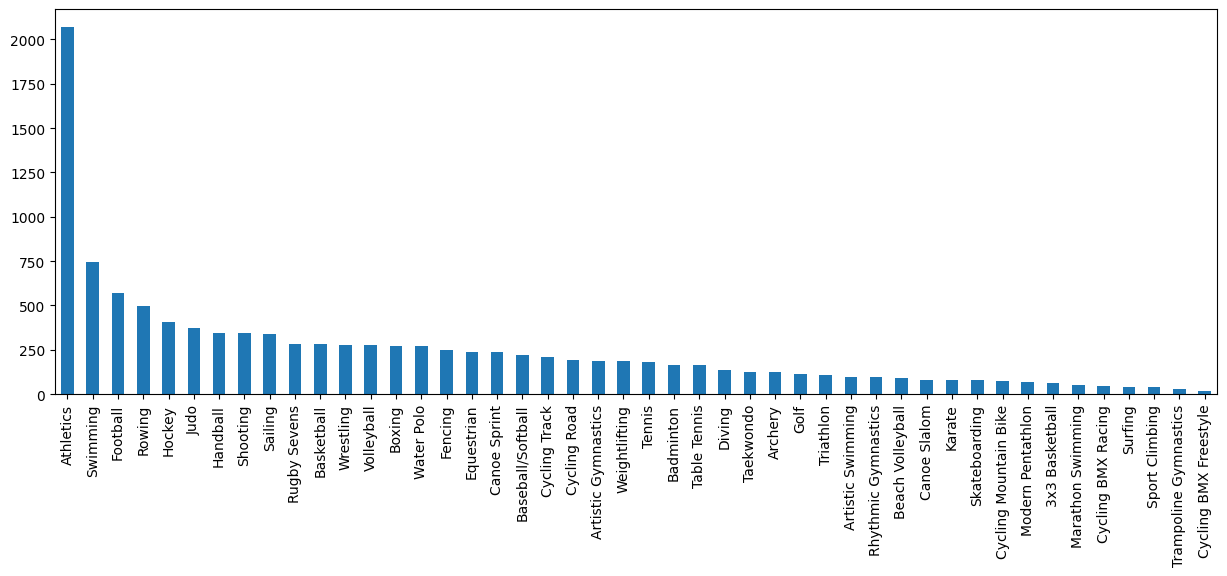

In [489]:
plt.figure(figsize=(15,5))
plot = athlete_data["Discipline"].value_counts().plot(kind='bar')
plt.show()

### 5. Plot a descendingly ordered categorical bar plot to show gender segregated athlete counts in different sports.

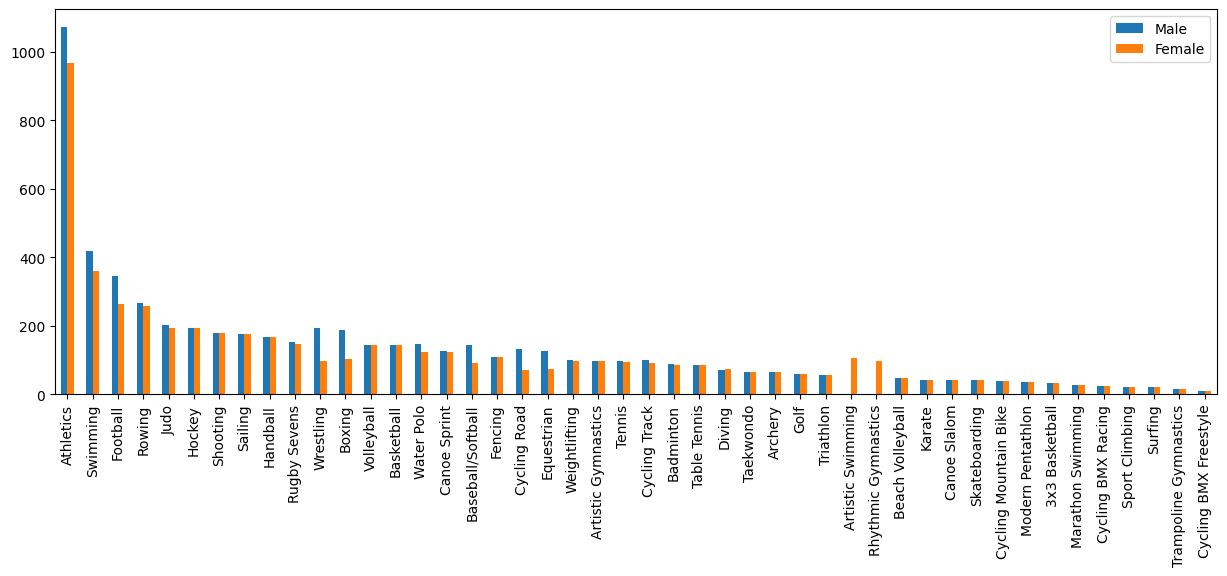

In [556]:
df1 = gender_data.sort_values("Total", ascending=False)[["Discipline", "Male", "Female"]]
plot = df1.plot.bar(figsize=(15,5))
plot.set_xticklabels(df1["Discipline"])
plt.show()

### 6. Which sport has they highest proportion of male to female athletes? Plot a descendingly ordered bar plot to depict male to female athletes proportion across different sports.

In [558]:
gender_data.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [37]:
#finding the proportion of male to female athletes
gender_data["male_to_female"] = gender_data.apply(lambda row: row["Male"]/row["Female"], axis=1)
sorted_gender_data = gender_data.sort_values("male_to_female", ascending=False)
sorted_gender_data.head(1)

,Discipline,Female,Male,Total,male_to_female
45,Wrestling,96,193,289,2.010417


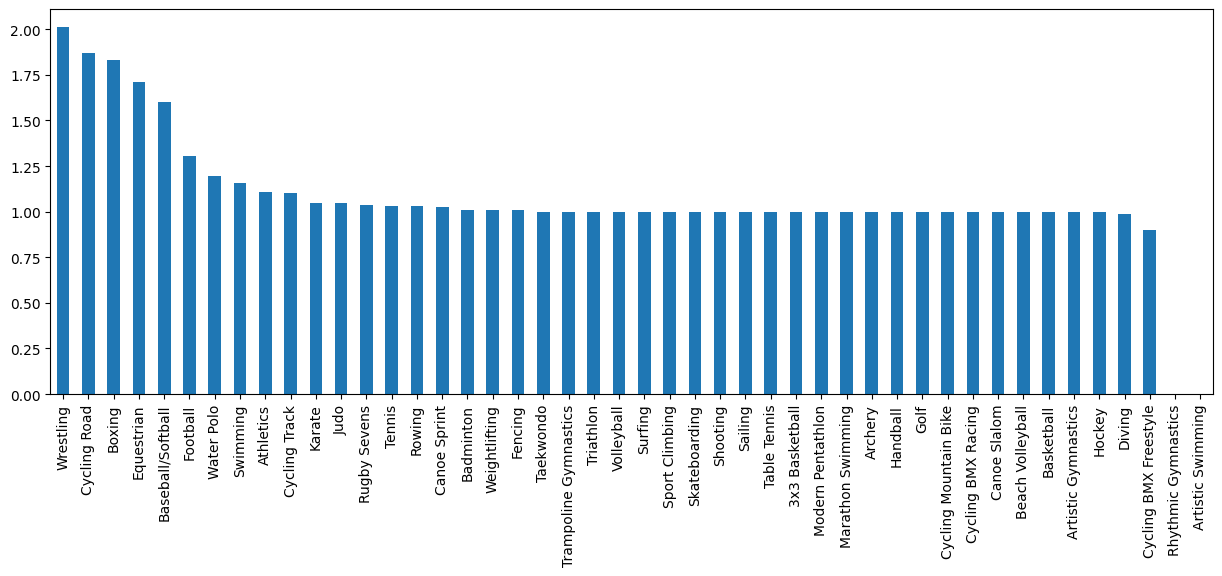

In [577]:
# plotting the descendingly ordered bar plot
plot = sorted_gender_data["male_to_female"].plot.bar(figsize=(15,5))
plot.set_xticklabels(sorted_gender_data["Discipline"])
plt.show()

### 7. Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each? Use bar plot to for illustration.  

In [710]:
medal_tally = []
for category in ["Gold", "Silver", "Bronze"]:
    #finding the country with highest number of medals in each category and appending the count to list
    high = medal_data.iloc[medal_data[category].idxmax()][["Team/NOC", category]].values
    medal_tally.append([category+"-High", high[0], high[1]])
    
    #finding the country with lowest number of medals in each category and appending the count to list
    low = medal_data.iloc[medal_data[category].idxmin()][["Team/NOC", category]].values
    medal_tally.append([category+"-Low", low[0], low[1]])
    
#creating a dataframe
medal_tally = pd.DataFrame(medal_tally, columns=["Category", "Country", "Medals"])

In [711]:
medal_tally

,Category,Country,Medals
0,Gold-High,United States of America,39
1,Gold-Low,Colombia,0
2,Silver-High,United States of America,41
3,Silver-Low,Uzbekistan,0
4,Bronze-High,United States of America,33
5,Bronze-Low,Sweden,0


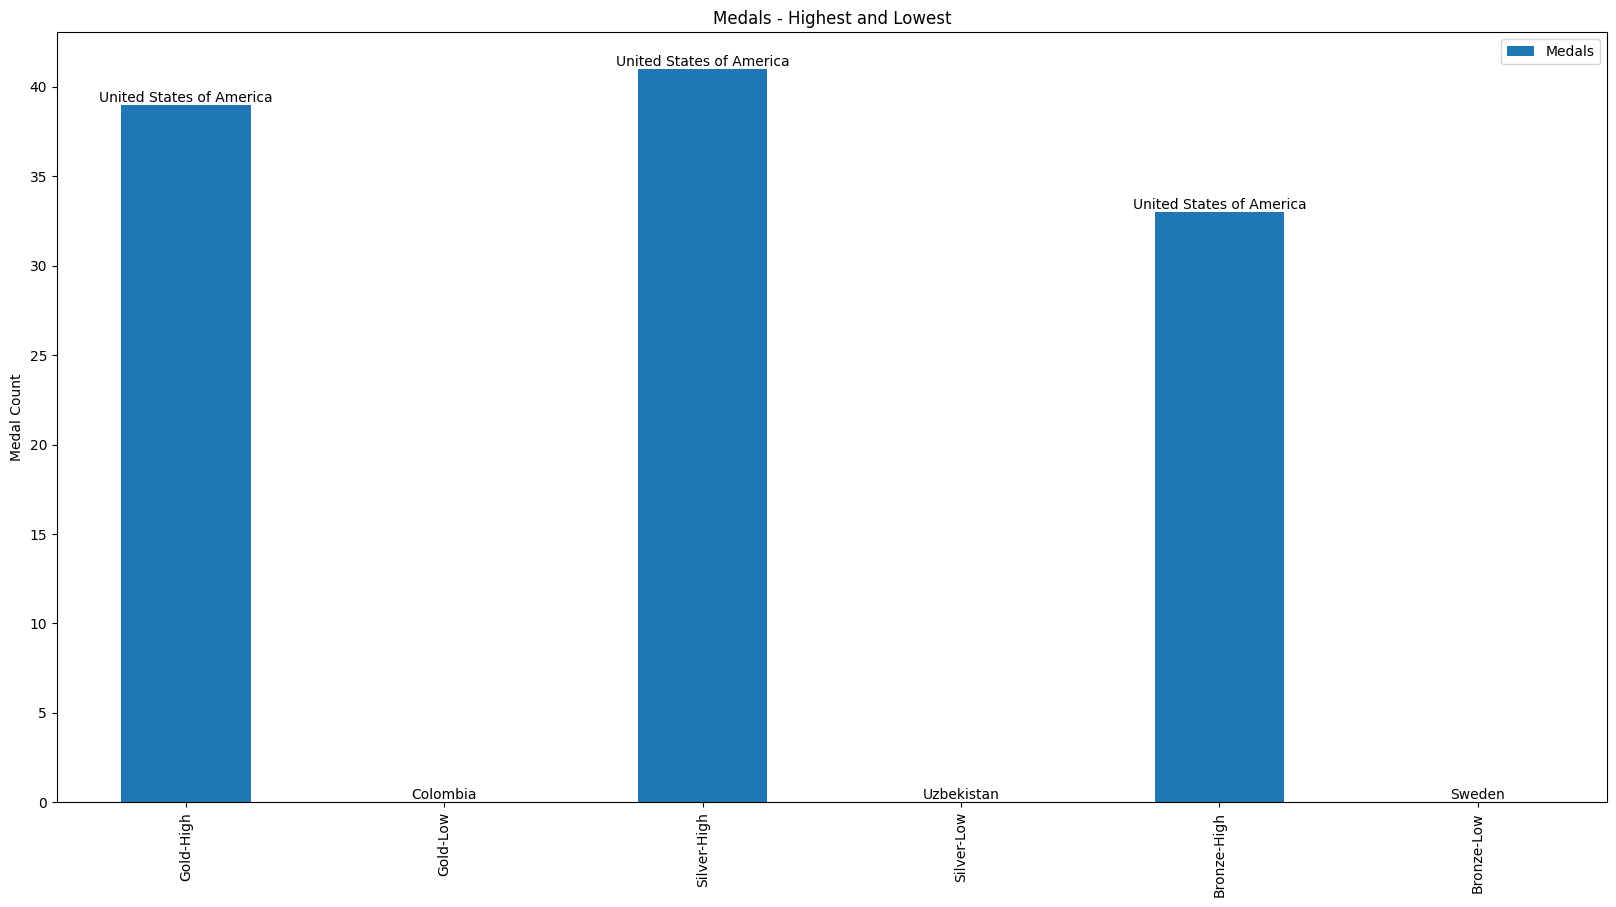

In [712]:
#plotting the above results
plt.rcParams["figure.figsize"] = (20,10)
ax = medal_tally.plot(kind="bar")
ax.set_title("Medals - Highest and Lowest")
ax.set_ylabel("Medal Count")
ax.set_xticklabels(medal_tally["Category"])

#adding country name to each bar
labels = medal_tally["Country"]

for i, label in enumerate(labels):
    plt.annotate(label, xy=(i, ax.patches[i].get_height()), ha='center', va='bottom')

plt.show()

### 8. Which country has the highest number of medals (Gold – Silver- Bronze) per capita (participants)? 

In [672]:
# participant count per country
country_participants = athlete_data["NOC"].value_counts().to_frame().reset_index().rename(columns={"index": "Country", "NOC": "ParticipantCount"})

In [674]:
country_participants.head()

,Country,ParticipantCount
0,United States of America,615
1,Japan,586
2,Australia,470
3,People's Republic of China,401
4,Germany,400


In [683]:
# Merging the medal_data and the identified country_participants from athlete_data
medal_participants = pd.merge(medal_data, country_participants, left_on='Team/NOC', right_on='Country', how='left').drop("Country", axis=1)

In [685]:
medal_participants.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,ParticipantCount
0,1,United States of America,39,41,33,113,1,615
1,2,People's Republic of China,38,32,18,88,2,401
2,3,Japan,27,14,17,58,5,586
3,4,Great Britain,22,21,22,65,4,366
4,5,ROC,20,28,23,71,3,318


In [690]:
# finding per capita participants
for cat in ["Gold", "Silver", "Bronze"]:
    medal_participants[cat+"_percap"] = medal_participants.apply(lambda row: row[cat]/row["ParticipantCount"], axis=1)

In [696]:
#country with highest number of medals (in each category per capita (participants)
for cat in ["Gold", "Silver", "Bronze"]:
    print(cat, " : ", medal_participants.iloc[medal_participants[cat+"_percap"].idxmax()]["Team/NOC"])

Gold  :  Bermuda
Silver  :  San Marino
Bronze  :  San Marino


### 9. List countries with no medals? 

In [698]:
countries_with_medals = set(medal_data["Team/NOC"].unique())

In [702]:
countries_without_medals = np.array(all_countries - countries_with_medals)

In [703]:
countries_without_medals

array({'Albania', 'Monaco', 'Djibouti', 'Guam', 'Madagascar', 'Palestine', 'Yemen', 'Marshall Islands', 'American Samoa', "Lao People's Democratic Republic", 'Haiti', 'Nicaragua', 'Paraguay', 'Guatemala', 'Kiribati', 'Cook Islands', 'Federated States of Micronesia', 'Senegal', 'Rwanda', 'Guyana', 'Bangladesh', 'Zambia', 'Benin', 'South Sudan', 'Algeria', 'Sierra Leone', 'Dominica', 'United Republic of Tanzania', 'Zimbabwe', 'Sudan', 'Burundi', 'Pakistan', 'Luxembourg', 'Belize', 'Gabon', 'Mauritania', 'Barbados', 'Saint Kitts and Nevis', 'Comoros', 'Lebanon', 'Papua New Guinea', 'Bolivia', 'Tonga', 'Niger', 'Central African Republic', 'Vietnam', 'Democratic Republic of the Congo', 'Afghanistan', 'St Vincent and the Grenadines', 'Panama', 'Eritrea', 'Andorra', 'Aruba', 'Nepal', 'Somalia', 'Singapore', 'Mali', 'Honduras', 'Tuvalu', 'Virgin Islands, British', 'Bosnia and Herzegovina', 'Chile', 'Myanmar', 'Mauritius', 'Sri Lanka', 'Libya', 'Suriname', 'Cape Verde', 'Bhutan', 'Trinidad and 

### 10. Which country had the greatest number of coaches. Plot a descendingly ordered bar plot to show coach counts in different countries. 

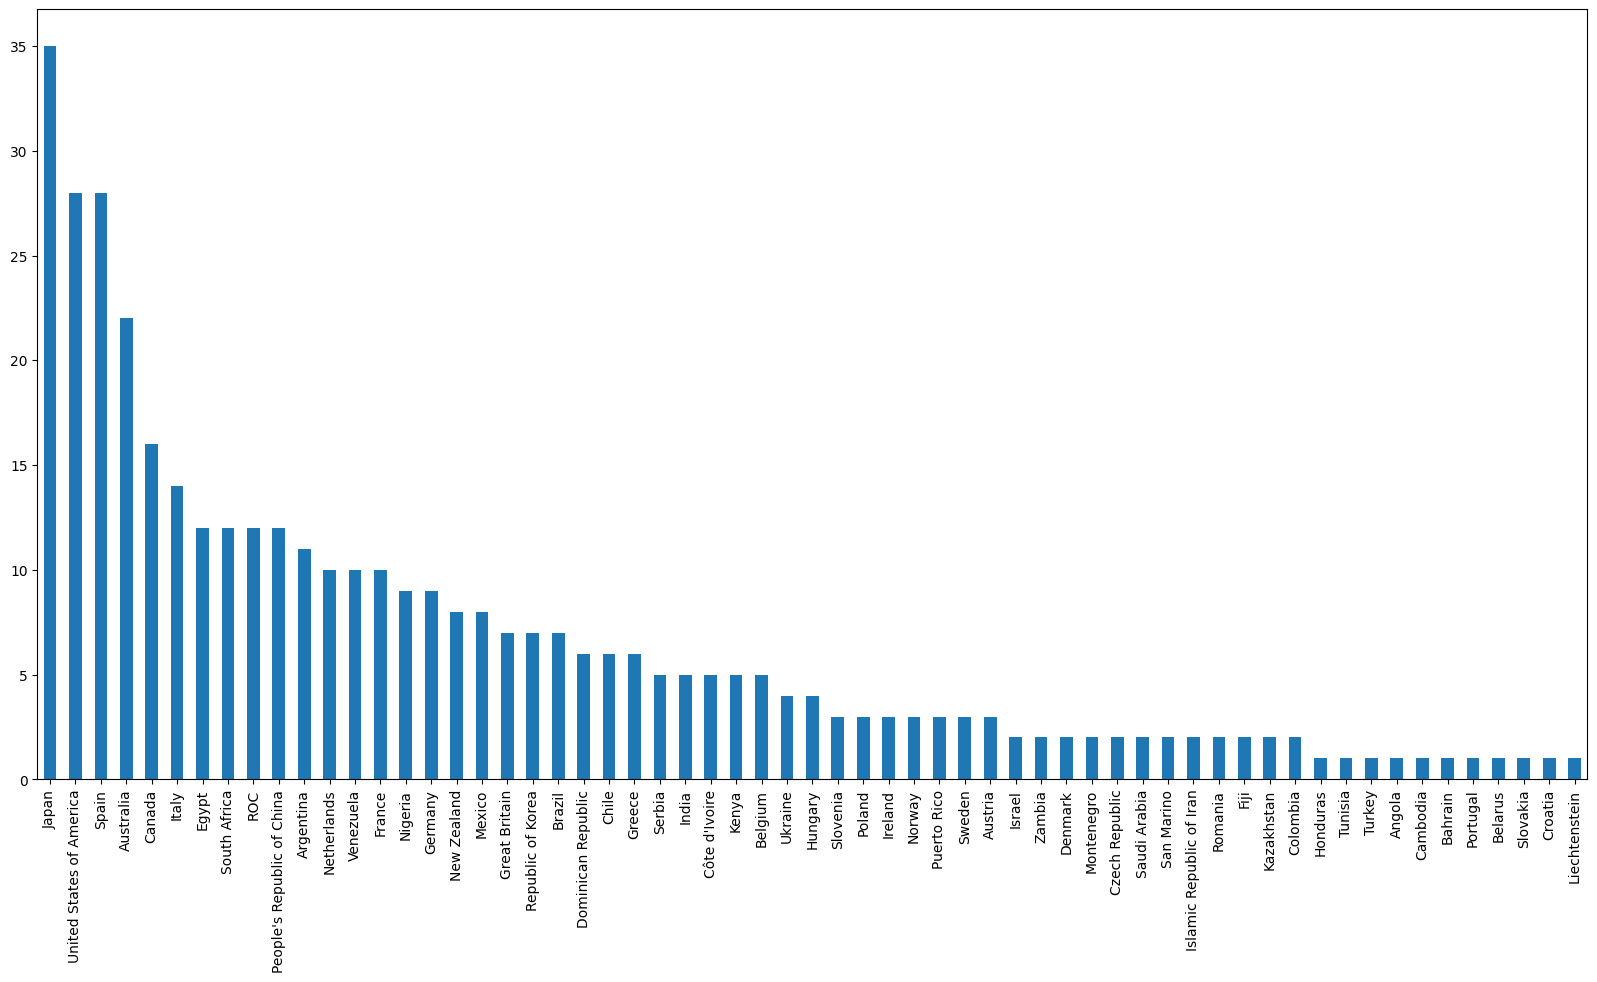

In [717]:
plot = coach_data["NOC"].value_counts().plot(kind="bar")
plt.show()

### 11. Plot a descendingly ordered bar plot to show coach counts across different sports.  

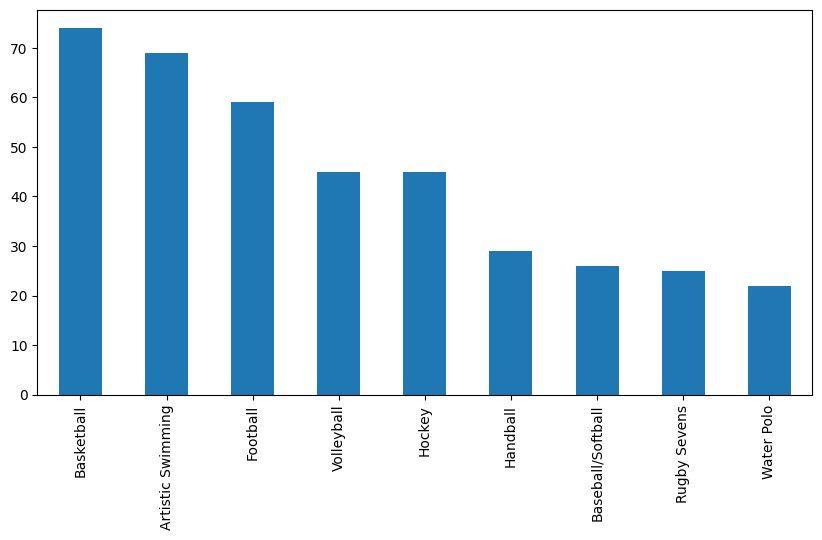

In [723]:
plt.rcParams["figure.figsize"] = (10,5)
plot = coach_data["Discipline"].value_counts().plot(kind="bar")
plt.show()

### 12. Identify the most popular coach, female and male athlete first name? 

In [38]:
# splitting the name and keeping only the first name
def get_firstname(name):
    return name.split(" ")[0]

In [39]:
#creating new column with first names of coach and athletes
coach_data["first_name"] = coach_data["Name"].apply(get_firstname)
athlete_data["first_name"] = athlete_data["Name"].apply(get_firstname)

In [40]:
athlete_data.head()

,Name,NOC,Discipline,first_name
0,AALERUD Katrine,Norway,Cycling Road,AALERUD
1,ABAD Nestor,Spain,Artistic Gymnastics,ABAD
2,ABAGNALE Giovanni,Italy,Rowing,ABAGNALE
3,ABALDE Alberto,Spain,Basketball,ABALDE
4,ABALDE Tamara,Spain,Basketball,ABALDE


In [41]:
coach_data.head()

,Name,NOC,Discipline,Event,first_name
0,ABDELMAGID Wael,Egypt,Football,NaN,ABDELMAGID
1,ABE Junya,Japan,Volleyball,NaN,ABE
2,ABE Katsuhiko,Japan,Basketball,NaN,ABE
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN,ADAMA
4,AGEBA Yuya,Japan,Volleyball,NaN,AGEBA


In [753]:
# printing the most common coach and athlete with their first names
print("Popular Name:")
print("Coach: ", coach_data["first_name"].mode()[0])
print("Female and Male: ", athlete_data["first_name"].mode()[0])

Popular Name:
Coach:  de
Female and Male:  van


# Section 4:  ( Show Analysis ) - ( Weighting = 20% )

based on the provided show dataset, please answer the following questions: 

### 1. Import the dataset in to your workspace as a data frame

In [43]:
show_data = pd.read_csv("Dataset/show.csv")

In [44]:
show_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [925]:
show_data.describe(include='object')

,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,1713,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,3205,1791,362


### 2. Removed all duplicates and perform normal cleaning procedure if needed.

In [45]:
#finding duplicate entries
show_data[show_data["title"].duplicated()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [46]:
show_data[show_data["title"]=="9-Feb"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,s3997,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"


In [47]:
show_data[show_data["title"]=="22-Jul"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"


In [48]:
show_data[show_data["title"]=="15-Aug"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [49]:
#dropping duplicate values
show_data.drop_duplicates('title', keep=False, inplace=True)

In [50]:
show_data.describe(include='object')

,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8784,8784,8784,8784,8784,8784,8784,8784,8784
unique,8784,2,8784,4527,86,1713,14,220,513
top,s1,Movie,Dick Johnson Is Dead,Not Given,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6122,1,2586,3240,110,3205,1789,362


In [51]:
show_data["rating"].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [52]:
(show_data["title"]=="Not Given").sum()

0

In [53]:
show_data["country"].value_counts()

United States     3240
India             1055
United Kingdom     638
Pakistan           419
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [54]:
show_data.replace("Not Given", np.NaN, inplace=True)

In [55]:
show_data.describe(include='object')

,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8784,8784,8784,6198,8497,8784,8784,8784,8784
unique,8784,2,8784,4526,85,1713,14,220,513
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6122,1,20,3240,110,3205,1789,362


### 3. Changing datatype of date_added column to datetime so you can conduct time based analysis

In [56]:
show_data['date_added'] = pd.to_datetime(show_data['date_added'])

In [57]:
show_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### 4. Create 3 separate columns for week-day, month, and year based on the date_added column and name them month_added,	year_added, and	day_added respectively. 

In [58]:
show_data["day_added"] = show_data["date_added"].dt.dayofweek

In [59]:
show_data["month_added"] = show_data["date_added"].dt.month

In [60]:
show_data["year_added"] = show_data["date_added"].dt.year

In [61]:
show_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,5,9,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",4,9,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",4,9,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2,9,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",4,9,2021


### 5. Group shows by their type and display the frequency of each type. Also, use a piechart to display show type percentage.

In [64]:
show_data["type"].value_counts()

Movie      6122
TV Show    2662
Name: type, dtype: int64

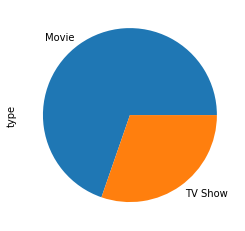

In [65]:
plot = show_data["type"].value_counts().plot(kind="pie")
plt.show()

### 6. Display the number of shows that each director has ever directed along with the show type. 

In [945]:
pd.concat([show_data.groupby('director')['type'].apply(list).to_frame(), show_data.groupby('director')['type'].count().to_frame()], axis=1)


,type,type
director,,
A. L. Vijay,"[Movie, Movie]",2
A. Raajdheep,[Movie],1
A. Salaam,[Movie],1
A.R. Murugadoss,"[Movie, Movie]",2
Aadish Keluskar,[Movie],1
...,...,...
Çagan Irmak,[Movie],1
Ísold Uggadóttir,[Movie],1
Óskar Thór Axelsson,[Movie],1


### 7. Display the top 10 most active directors. 

In [946]:
show_data["director"].value_counts()[:10]

Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Name: director, dtype: int64

### 8. Group shows based on country and type. Display their frequency too. 

In [947]:
show_data.groupby(['country', 'type']).count()["show_id"].to_frame()

show_id
country      type            
Argentina    Movie         56
             TV Show       20
Australia    Movie         61
             TV Show       53
Austria      Movie          8
...                       ...
Uruguay      TV Show        1
Venezuela    Movie          2
Vietnam      Movie          7
West Germany Movie          1
Zimbabwe     Movie          1

[136 rows x 1 columns]

### 9. Identify countries with the highest number of show production (top 10). Display their show production frequency too. Beside table, use bar plot to articulate your findings.

In [62]:
countries_df = show_data["country"].value_counts()[:10].to_frame()
countries_df

,country
United States,3240
India,1055
United Kingdom,638
Pakistan,419
Canada,271
Japan,259
South Korea,214
France,213
Spain,182
Mexico,138


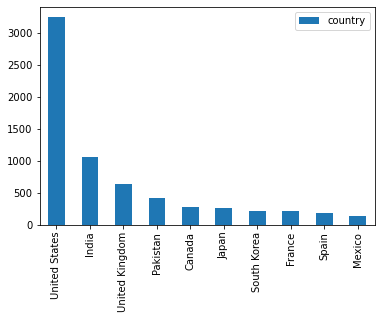

In [63]:
plot = countries_df.plot(kind="bar")
plt.show()

### 10. Group shows based on the listed_in (genre) feature. Display their frequency too.

In [950]:
#splitting the individual listed genre to perform the grouping function
show_data["listed_in"] = show_data["listed_in"].str.split(", ")

In [951]:
exp_show_data = show_data.explode("listed_in", ignore_index=True)

In [952]:
exp_show_data.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,5,9,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,4,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,International TV Shows,4,9,2021
3,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,TV Action & Adventure,4,9,2021
4,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,TV Dramas,4,9,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,TV Horror,4,9,2021
6,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,TV Mysteries,4,9,2021
7,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,2,9,2021
8,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,Comedies,2,9,2021
9,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas,4,9,2021


In [953]:
exp_show_data.groupby("listed_in")["show_id"].count().to_frame()

,show_id
listed_in,
Action & Adventure,859
Anime Features,71
Anime Series,174
British TV Shows,252
Children & Family Movies,641
Classic & Cult TV,26
Classic Movies,116
Comedies,1672
Crime TV Shows,469


In [954]:
# Without expanding
show_data_2 = pd.read_csv("Dataset/show.csv")
show_data_2.groupby("listed_in")["show_id"].count().to_frame()

,show_id
listed_in,
Action & Adventure,128
"Action & Adventure, Anime Features",1
"Action & Adventure, Anime Features, Children & Family Movies",4
"Action & Adventure, Anime Features, Classic Movies",2
"Action & Adventure, Anime Features, Horror Movies",1
...,...
"TV Horror, TV Mysteries, Teen TV Shows",1
"TV Horror, Teen TV Shows",2
"TV Sci-Fi & Fantasy, TV Thrillers",1


### 11. Identify the top 10 most popular genre based on the listed_in feature.

In [956]:
exp_show_data["listed_in"].value_counts()[:10].to_frame()

,listed_in
International Movies,2752
Dramas,2422
Comedies,1672
International TV Shows,1347
Documentaries,869
Action & Adventure,859
TV Dramas,760
Independent Movies,754
Children & Family Movies,641
Romantic Movies,616


### 12. Use line plot to display show frequency per year segregated by show type. 

In [67]:
show_df = show_data.groupby(["release_year", "type"], as_index=False)["show_id"].count()
show_df

,release_year,type,show_id
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


In [69]:
# separating show types and renaming their column names
show_tv = show_df[show_df["type"]=="TV Show"][["release_year", "show_id"]]
show_tv.rename(columns={"show_id": "TV Shows"}, inplace=True)

show_movie = show_df[show_df["type"]=="Movie"][["release_year", "show_id"]]
show_movie.rename(columns={"show_id": "Movies"}, inplace=True)

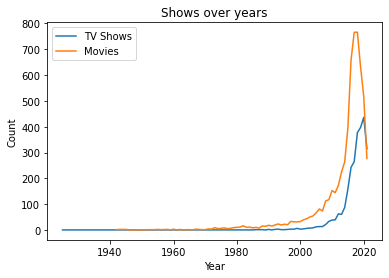

In [70]:
# Ploting both show types in a graph 
plt.plot(show_tv["release_year"], show_tv["TV Shows"], label ='TV Shows')
plt.plot(show_movie["release_year"], show_movie["Movies"], label ='Movies')

plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Shows over years')
plt.legend()
plt.show()

# Section 3:  ( Chessboard ) - ( Weighting = 10% )

A chessboard is an eight-by-eight grid of squares. A queen is a chess piece that can
move on the chessboard any number of squares along any row, column, or diagonal.
A queen is attacking another piece if in a single move, it can move to the square the
piece is on without jumping over any other piece. (In other words, if the other piece is
in the line of sight of the queen, then it is attacked by it.) The eight queens problem
poses the question of how eight queens can be placed on a chessboard without any
queen attacking another queen.

![queens](Dataset/queen.png)

To represent squares on the chessboard, we will assign each an integer row and an
integer column. We can ensure each of the eight queens is not on the same column
by simply assigning them sequentially the columns 1 through 8. The variables in our
constraint-satisfaction problem can just be the column of the queen in question. The
domains can be the possible rows (again, 1 through 8).

### Write a piece of code that prints out all the possible arrangements of eight queens on the chessboard. 
**Important:** Your code must be fully commented. 


In [2]:
# Recursion Techniques referred online
#https://www.w3schools.com/python/gloss_python_function_recursion.asp
#https://www.cs.usfca.edu/~galles/visualization/RecQueens.html
#https://www.kaggle.com/code/ozgurcanarican/n-queens-solution-with-recursive-functions/notebook
#https://gist.github.com/justjkk/372468/6903af265950cf59ea33301002954024d6d7e82f

import numpy as np
SIZE = 8
def check_pos(row, column, board):
    
    # entire column is invalid
    if any(board[:, column] == 1):
        return False
    
    # left diagonal of previous rows are invalid

    for i, j in zip(range(row, -1, -1), range(column, -1, -1)):
        if board[i][j] == 1:
            return False

        if i == 0 or j == 0:
            break

    # right diagonal of previous rows are invalid

    for i, j in zip(range(row, -1, -1), range(column, SIZE)):
        if board[i][j] == 1:
            return False

        if i == 0 or j == SIZE-1:
            break

    return True

In [13]:
board = np.full((SIZE, SIZE), 0)
solutions = []
def queen(board, row=0):
    if row == SIZE:
        print(board)
        solutions.append(board)
        return None  # if only 1 solution then the resultant board can be returned from here
        # but we want to get all solutions and hence the result if saved into a list and 
        #backtracking is allowed to run further

    found = False

    for position in range(SIZE):  # for all positions on the board
        if check_pos(row, position, board):  # check for only valid positions
            found = True
            board[row][position] = 1
            if queen(board, row+1) is None:
                # if the queen could not be placed means the queen placed in the previous row needs to be unset
                # recursively, until a possible configuration is met
                board[row][position] = 0
            else:
                return board 

    if not found: # a position to place queen could not be found
        return None

queen(board)
print('All the possible arrangements of eight queens on the chessboard is:', len(solutions))
# All possible positions to place 8 queens are 92 (1 represents queen position)

[[1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]]
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0]]
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]]
[[0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]]
[[0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0]]
[[0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]
 [1 0 

# Section 4:  ( Encryption ) - ( Weighting = 10% )

Encryption is the method by which information is converted into secret code that hides the information's true meaning. The science of encrypting and decrypting information is called cryptography.

In computing, unencrypted data is also known as plaintext, and encrypted data is called ciphertext. The formulas used to encode and decode messages are called encryption algorithms

In this task you need to create a simple transposition encryption algorithms where plaintext characters are re-arranged instead of replaced to encode a message. This algorithm  encodes a message by writing it down and up diagonally over successive rows as illustrated below. For example, the secret message **“THIS IS A SECRET MESSAGE”** encoded over 4 rails would look like this:

![queens](Dataset/cipher.png)

We then create the ciphertext by reading off characters left to right, top to bottom. For our example message, the cipher text becomes:

**TATGHSSEMAEIIERESSCS**

Write a piece of code capable of **encrypting** and **decrypting** a message using the aforementioned technique.  Use the last digit (most right) of your **SID** as the encryption key. 

Sample input plainText: **You speak an infinite deal of nothing.**

In [3]:
#SID No: 2161776
SID = 6

In [4]:
#Encription

def encrypt(text, show_matrix=True):

    out = []
    msg_len = len(text)
    matrix = np.full((SID, msg_len), '', dtype=str) 
    

    i = 0
    direction = 1
    #looping through the text and positioning the values diagonally in the matrix
    for j in range(msg_len):
        matrix[i][j] = text[j]

        i = i+direction
# flipping the direction after reaching max no. of rows
        if i == SID-1 or i == 0:  
            direction *= -1

    if show_matrix:
        print(matrix)

#reading the values row-wise
    for i in range(SID):
        out.extend(matrix[i][matrix[i] != ""])

    return "".join(out)

In [5]:
#Decryption

def decrypt(text, show_matrix=False):
    upper_skip = 2*(SID-1)  #equation to skip through the rows in each iteration
    lower_skip = 0

    out = []
    msg_len = len(text)
    matrix = np.full((SID, msg_len), '', dtype=str)

#positioning the matrix using loop and filling the values with a combination of newer values of upper_skip and 
# lower_skip after every iteration (as mentioned below)
    counter = 0
    for i in range(SID):
        j = i
        matrix[i][j] = text[counter]
        counter += 1
        while (j < msg_len):
            j = j+upper_skip
            if upper_skip > 0 and j < msg_len:
                matrix[i][j] = text[counter]
                counter += 1

            j = j+lower_skip
            if lower_skip > 0 and j+1 < msg_len:
                j = j+1
                matrix[i][j] = text[counter]
                counter += 1
        #decreasing the upper skip and increaing the lower skip after each iteration to position the values       
        lower_skip = (2*i)+1
        upper_skip -= 2

    if show_matrix:
        print(matrix)
#reading the values column-wise
    for i in range(msg_len):
        out.extend(matrix[:, i][matrix[:, i] != ""])

    return "".join(out)

In [6]:
print(encrypt("THISISASECRETMESSAGE"))
print(decrypt("TRHCEEIETGSSMAIAESSS"))

[['T' '' '' '' '' '' '' '' '' '' 'R' '' '' '' '' '' '' '' '' '']
 ['' 'H' '' '' '' '' '' '' '' 'C' '' 'E' '' '' '' '' '' '' '' 'E']
 ['' '' 'I' '' '' '' '' '' 'E' '' '' '' 'T' '' '' '' '' '' 'G' '']
 ['' '' '' 'S' '' '' '' 'S' '' '' '' '' '' 'M' '' '' '' 'A' '' '']
 ['' '' '' '' 'I' '' 'A' '' '' '' '' '' '' '' 'E' '' 'S' '' '' '']
 ['' '' '' '' '' 'S' '' '' '' '' '' '' '' '' '' 'S' '' '' '' '']]
TRHCEEIETGSSMAIAESSS
THISISASECRETMESSAGE


In [7]:
print(encrypt("You speak an infinite deal of nothing."))

[['Y' '' '' '' '' '' '' '' '' '' 'a' '' '' '' '' '' '' '' '' '' 'e' '' ''
  '' '' '' '' '' '' '' 'n' '' '' '' '' '' '' '']
 ['' 'o' '' '' '' '' '' '' '' ' ' '' 'n' '' '' '' '' '' '' '' 't' '' ' '
  '' '' '' '' '' '' '' ' ' '' 'o' '' '' '' '' '' '']
 ['' '' 'u' '' '' '' '' '' 'k' '' '' '' ' ' '' '' '' '' '' 'i' '' '' ''
  'd' '' '' '' '' '' 'f' '' '' '' 't' '' '' '' '' '']
 ['' '' '' ' ' '' '' '' 'a' '' '' '' '' '' 'i' '' '' '' 'n' '' '' '' ''
  '' 'e' '' '' '' 'o' '' '' '' '' '' 'h' '' '' '' '.']
 ['' '' '' '' 's' '' 'e' '' '' '' '' '' '' '' 'n' '' 'i' '' '' '' '' ''
  '' '' 'a' '' ' ' '' '' '' '' '' '' '' 'i' '' 'g' '']
 ['' '' '' '' '' 'p' '' '' '' '' '' '' '' '' '' 'f' '' '' '' '' '' '' ''
  '' '' 'l' '' '' '' '' '' '' '' '' '' 'n' '' '']]
Yaeno nt  ouk idft aineoh.senia igpfln


In [8]:
print(decrypt("Yaeno nt  ouk idft aineoh.senia igpfln"))

You speak an infinite deal of nothing.


In [9]:
print(decrypt(encrypt("You speak an infinite deal of nothing.")))

[['Y' '' '' '' '' '' '' '' '' '' 'a' '' '' '' '' '' '' '' '' '' 'e' '' ''
  '' '' '' '' '' '' '' 'n' '' '' '' '' '' '' '']
 ['' 'o' '' '' '' '' '' '' '' ' ' '' 'n' '' '' '' '' '' '' '' 't' '' ' '
  '' '' '' '' '' '' '' ' ' '' 'o' '' '' '' '' '' '']
 ['' '' 'u' '' '' '' '' '' 'k' '' '' '' ' ' '' '' '' '' '' 'i' '' '' ''
  'd' '' '' '' '' '' 'f' '' '' '' 't' '' '' '' '' '']
 ['' '' '' ' ' '' '' '' 'a' '' '' '' '' '' 'i' '' '' '' 'n' '' '' '' ''
  '' 'e' '' '' '' 'o' '' '' '' '' '' 'h' '' '' '' '.']
 ['' '' '' '' 's' '' 'e' '' '' '' '' '' '' '' 'n' '' 'i' '' '' '' '' ''
  '' '' 'a' '' ' ' '' '' '' '' '' '' '' 'i' '' 'g' '']
 ['' '' '' '' '' 'p' '' '' '' '' '' '' '' '' '' 'f' '' '' '' '' '' '' ''
  '' '' 'l' '' '' '' '' '' '' '' '' '' 'n' '' '']]
You speak an infinite deal of nothing.


## Good Luck!